In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
from lxml import etree
from matplotlib.patches import Rectangle

In [2]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.3
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [3]:
data=glob.glob(r'E:/mydata/data/xmls/*.xml')
path=[]
for i in data:
    a=i.split('\\')[-1]
    b=a.split('.xml')[0]
    path.append(b)
imgpath=[]
for i in path:
    c='E:/mydata/images/'+i+'.jpg'
    imgpath.append(c)
imgpath

['E:/mydata/images/Abyssinian_1.jpg',
 'E:/mydata/images/Abyssinian_10.jpg',
 'E:/mydata/images/Abyssinian_100.jpg',
 'E:/mydata/images/Abyssinian_101.jpg',
 'E:/mydata/images/Abyssinian_102.jpg',
 'E:/mydata/images/Abyssinian_103.jpg',
 'E:/mydata/images/Abyssinian_105.jpg',
 'E:/mydata/images/Abyssinian_106.jpg',
 'E:/mydata/images/Abyssinian_107.jpg',
 'E:/mydata/images/Abyssinian_108.jpg',
 'E:/mydata/images/Abyssinian_109.jpg',
 'E:/mydata/images/Abyssinian_11.jpg',
 'E:/mydata/images/Abyssinian_110.jpg',
 'E:/mydata/images/Abyssinian_111.jpg',
 'E:/mydata/images/Abyssinian_112.jpg',
 'E:/mydata/images/Abyssinian_113.jpg',
 'E:/mydata/images/Abyssinian_114.jpg',
 'E:/mydata/images/Abyssinian_115.jpg',
 'E:/mydata/images/Abyssinian_116.jpg',
 'E:/mydata/images/Abyssinian_117.jpg',
 'E:/mydata/images/Abyssinian_118.jpg',
 'E:/mydata/images/Abyssinian_119.jpg',
 'E:/mydata/images/Abyssinian_12.jpg',
 'E:/mydata/images/Abyssinian_120.jpg',
 'E:/mydata/images/Abyssinian_121.jpg',
 'E:/

In [4]:
def reads(name):
    names=open(name).read()
    datas=etree.HTML(names)
    width=int(datas.xpath('//size/width/text()')[0])
    height=int(datas.xpath('//size/height/text()')[0])
    xmin=int(datas.xpath('//bndbox/xmin/text()')[0])
    xmax=int(datas.xpath('//bndbox/xmax/text()')[0])
    ymin=int(datas.xpath('//bndbox/ymin/text()')[0])
    ymax=int(datas.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width,ymin/height,xmax/width,ymax/height]

In [5]:
def img_good(path):
    img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[224,224])
    img=tf.cast(img,tf.float32)
    img=img/255
    return img

In [6]:
all_data=[reads(name) for name in data]
all_data

[[0.555, 0.18, 0.7083333333333334, 0.395],
 [0.192, 0.21, 0.768, 0.582],
 [0.383248730964467, 0.142, 0.850253807106599, 0.534],
 [0.12, 0.11501597444089456, 0.7088888888888889, 0.7507987220447284],
 [0.046, 0.05806451612903226, 0.65, 0.6881720430107527],
 [0.482, 0.19373219373219372, 0.724, 0.5584045584045584],
 [0.474, 0.2693333333333333, 0.746, 0.6053333333333333],
 [0.560546875, 0.15234375, 0.84765625, 0.5498046875],
 [0.188, 0.16964285714285715, 0.55, 0.6049107142857143],
 [0.1, 0.034653465346534656, 0.672, 0.7524752475247525],
 [0.2872340425531915,
  0.015555555555555555,
  0.8723404255319149,
  0.3244444444444444],
 [0.22395833333333334,
  0.19791666666666666,
  0.4895833333333333,
  0.3645833333333333],
 [0.0625, 0.025078369905956112, 0.4375, 0.5078369905956113],
 [0.596, 0.23383084577114427, 0.846, 0.5298507462686567],
 [0.22857142857142856, 0.034, 0.8836734693877552, 0.68],
 [0.46875, 0.2235294117647059, 0.6296875, 0.4611764705882353],
 [0.346875, 0.15130023640661938, 0.548437

In [7]:
out1,out2,out3,out4=list(zip(*all_data))
out1[0:7]

(0.555, 0.192, 0.383248730964467, 0.12, 0.046, 0.482, 0.474)

In [8]:
out1=np.array(out1)
out2=np.array(out2)
out3=np.array(out3)
out4=np.array(out4)

In [9]:
out_data=tf.data.Dataset.from_tensor_slices((out1,out2,out3,out4))
img_data=tf.data.Dataset.from_tensor_slices(imgpath)
imgs_data=img_data.map(img_good)
data_img=tf.data.Dataset.zip((imgs_data,out_data))
data_img

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [10]:
sess=data_img.take(len(imgpath))
tarin_data=sess.repeat().shuffle(buffer_size=len(imgpath)).batch(5)
tarin_data

<BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [11]:
model_kears=tf.keras.applications.Xception(include_top=False,
                                          input_shape=(224,224,3),
                                          weights='imagenet')

In [12]:
inputs=tf.keras.Input(shape=(224,224,3))

In [13]:
x=model_kears(inputs)

In [14]:
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(2048,activation='relu')(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
out1=tf.keras.layers.Dense(1)(x)
out2=tf.keras.layers.Dense(1)(x)
out3=tf.keras.layers.Dense(1)(x)
out4=tf.keras.layers.Dense(1)(x)
my_data=[out1,out2,out3,out4]
model=tf.keras.models.Model(inputs=inputs,outputs=my_data)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Model)                (None, 7, 7, 2048)   20861480    input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           xception[1][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         4196352     global_average_pooling2d[0][0]   
______________________________________________________________________________________________

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mse',metrics=['mae'])

In [17]:
deep=len(imgpath)//20

In [18]:
model.fit(tarin_data,epochs=5,steps_per_epoch=deep)

Train for 184 steps
Epoch 1/5
184/184 [==============================] - 59s 318ms/step - loss: 0.1283 - dense_2_loss: 0.0278 - dense_3_loss: 0.0173 - dense_4_loss: 0.0463 - dense_5_loss: 0.0369 - dense_2_mae: 0.1292 - dense_3_mae: 0.0995 - dense_4_mae: 0.1600 - dense_5_mae: 0.1478
Epoch 2/5
184/184 [==============================] - 36s 195ms/step - loss: 0.0614 - dense_2_loss: 0.0159 - dense_3_loss: 0.0093 - dense_4_loss: 0.0171 - dense_5_loss: 0.0191 - dense_2_mae: 0.0974 - dense_3_mae: 0.0748 - dense_4_mae: 0.1021 - dense_5_mae: 0.1065
Epoch 3/5
184/184 [==============================] - 36s 195ms/step - loss: 0.0432 - dense_2_loss: 0.0120 - dense_3_loss: 0.0069 - dense_4_loss: 0.0124 - dense_5_loss: 0.0119 - dense_2_mae: 0.0863 - dense_3_mae: 0.0636 - dense_4_mae: 0.0863 - dense_5_mae: 0.08562s - loss: 0.0441 - dense_2_loss: 0.0121 - dense_3_loss: 0.0071 - dense_4_loss: 0.0127 - dense_5_loss: 0.0121 - dense_2_mae: 0.0868 - dense_3_mae: 0.0646 - dense_4_mae: 0.0872 - dense
Epoch 4/

In [19]:
#model.save('D:/杂物/my_model.h5')

OSError: 

In [19]:
tf.keras.models.save_model(model,'E:/mydata/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: E:/mydata/assets


In [28]:
img='E:/mydata/dc/train/cat.107.jpg'
imgs=img_good(img)
imgs.shape

TensorShape([224, 224, 3])

In [29]:
#model=tf.keras.models.load_model('D:/杂物/my_model.h5')

In [30]:
new_img=tf.expand_dims(imgs,0)
outputs=model.predict(new_img)
outputs

[array([[0.42907202]], dtype=float32),
 array([[0.03876969]], dtype=float32),
 array([[0.9008373]], dtype=float32),
 array([[0.8241398]], dtype=float32)]

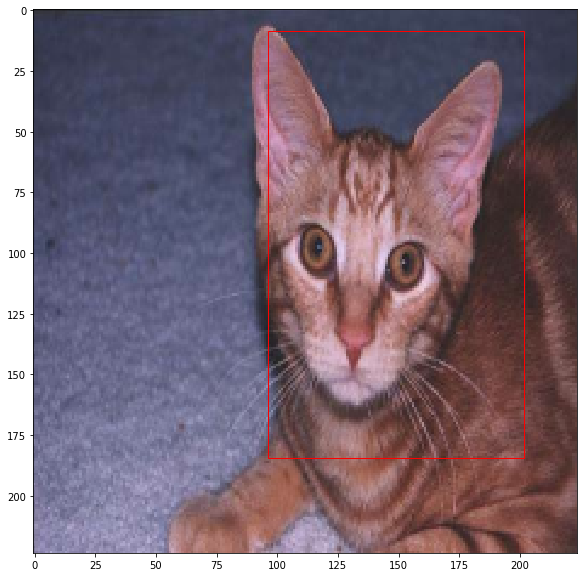

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(imgs)
out_1,out_2,out_3,out_4=outputs[0][0][0]*224,outputs[1][0][0]*224,outputs[2][0][0]*224,outputs[3][0][0]*224
rct=Rectangle((out_1,out_2),(out_3-out_1),(out_4-out_2),fill=False,color='red')
ax=plt.gca()
ax.axes.add_patch(rct)
plt.show()